## Data Science and Business Analytics Internship

## GRIP@The Spark Foundation 

## GRIPJAN'21

## Author - Harpragaas Singh

Task 5 :Indian Premier League Analysis 

Problem Statement :

1) Find out the most successful teams, players and factors contributing win or loss of a team.

2) Suggest teams or players a company should endorse for its products.

In [19]:
# Importing relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.io as pio

In [20]:
# Loading the dataset
ipl_match= pd.read_csv("matches.csv")
ipl_match.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [21]:
#Understanding dataset
ipl_match.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
id                 756 non-null int64
season             756 non-null int64
city               749 non-null object
date               756 non-null object
team1              756 non-null object
team2              756 non-null object
toss_winner        756 non-null object
toss_decision      756 non-null object
result             756 non-null object
dl_applied         756 non-null int64
winner             752 non-null object
win_by_runs        756 non-null int64
win_by_wickets     756 non-null int64
player_of_match    752 non-null object
venue              756 non-null object
umpire1            754 non-null object
umpire2            754 non-null object
umpire3            119 non-null object
dtypes: int64(5), object(13)
memory usage: 106.4+ KB


In [22]:
#Checking for columns which are empty
ipl_match.isna().sum()/len(ipl_match)

id                 0.000000
season             0.000000
city               0.009259
date               0.000000
team1              0.000000
team2              0.000000
toss_winner        0.000000
toss_decision      0.000000
result             0.000000
dl_applied         0.000000
winner             0.005291
win_by_runs        0.000000
win_by_wickets     0.000000
player_of_match    0.005291
venue              0.000000
umpire1            0.002646
umpire2            0.002646
umpire3            0.842593
dtype: float64

##### From the above dataset we can see 3rd umpire column have around 85% of the cells are empty. Thus, we will be discarding that column since it can disort the real picture.

In [23]:
ipl_match.drop('umpire3',inplace=True,axis=1)

In [25]:
ipl_match.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN


In [27]:
# 5 point summary 
ipl_match.describe()

,id,season,dl_applied,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000,756.000000,756.000000
mean,1792.178571,2013.444444,0.025132,13.283069,3.350529
std,3464.478148,3.366895,0.156630,23.471144,3.387963
min,1.000000,2008.000000,0.000000,0.000000,0.000000
25%,189.750000,2011.000000,0.000000,0.000000,0.000000
50%,378.500000,2013.000000,0.000000,0.000000,4.000000
75%,567.250000,2016.000000,0.000000,19.000000,6.000000
max,11415.000000,2019.000000,1.000000,146.000000,10.000000


##### Insights:

1. There are a total 756 matches hosted from 2008 to 2019.


2. The biggest margin of victory for the team batting first is 146 runs. It is also observed that 75% of the winning teams that bat first won by 19 runs.

 
3. The biggest victory of the team bowled first is by 10 wickets. It is also observed that 75% of the winning teams that bolwed first won by 6 wickets. 

In [33]:
ipl_match['season'].value_counts()

2013    76
2012    74
2011    73
2019    60
2018    60
2016    60
2014    60
2010    60
2017    59
2015    59
2008    58
2009    57
Name: season, dtype: int64

#### 1. Most Successful Team in IPL 

##### Team with most wins per season

In [34]:
team_perseason = ipl_match.groupby('season')['winner'].value_counts()

In [47]:
year = 2008
winper_season = pd.DataFrame(columns=['year', 'team', 'wins'])
for items in team_perseason.iteritems():    
    if items[0][0]==year:
        print(items)
        win_series = pd.DataFrame({
            'year': [items[0][0]],
            'team': [items[0][1]],
            'wins': [items[1]]
        })
        winper_season = winper_season.append(win_series,ignore_index=True)
        year += 1   

((2008, 'Rajasthan Royals'), 13)
((2009, 'Delhi Daredevils'), 10)
((2010, 'Mumbai Indians'), 11)
((2011, 'Chennai Super Kings'), 11)
((2012, 'Kolkata Knight Riders'), 12)
((2013, 'Mumbai Indians'), 13)
((2014, 'Kings XI Punjab'), 12)
((2015, 'Chennai Super Kings'), 10)
((2016, 'Sunrisers Hyderabad'), 11)
((2017, 'Mumbai Indians'), 12)
((2018, 'Chennai Super Kings'), 11)
((2019, 'Mumbai Indians'), 11)


In [48]:
winper_season

,year,team,wins
0,2008,Rajasthan Royals,13
1,2009,Delhi Daredevils,10
2,2010,Mumbai Indians,11
3,2011,Chennai Super Kings,11
4,2012,Kolkata Knight Riders,12
5,2013,Mumbai Indians,13
6,2014,Kings XI Punjab,12
7,2015,Chennai Super Kings,10
8,2016,Sunrisers Hyderabad,11
9,2017,Mumbai Indians,12


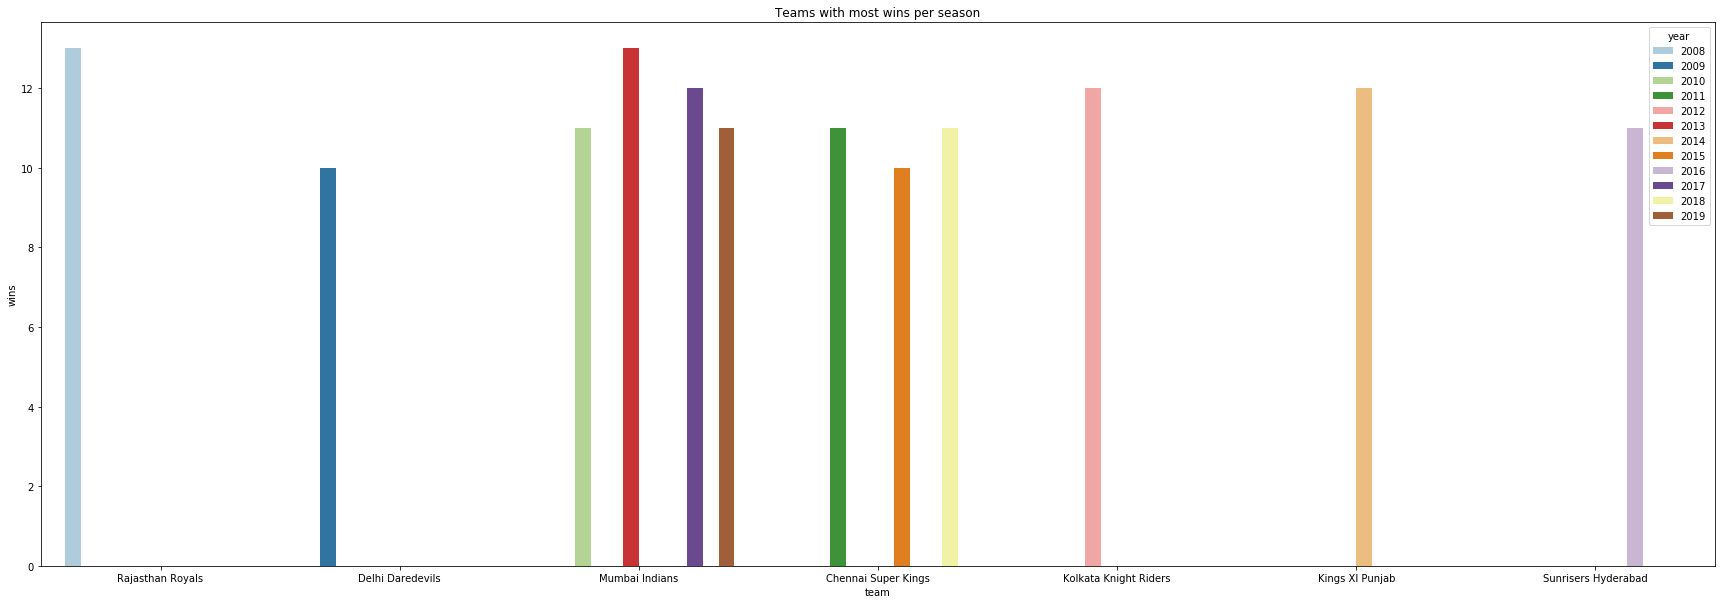

In [56]:
plt.figure(figsize = (30,10))
sns.barplot('team','wins',hue='year',data=winper_season,palette ='Paired')
plt.title('Teams with most wins per season')
plt.show()

##### Mumbai Indians has secured the most wins in four seasons( 2010, 2013, 2017 and 2019) followed by Chennai Super Kings (2011, 2015 and 2018)

#### 2. Most Valuable Player

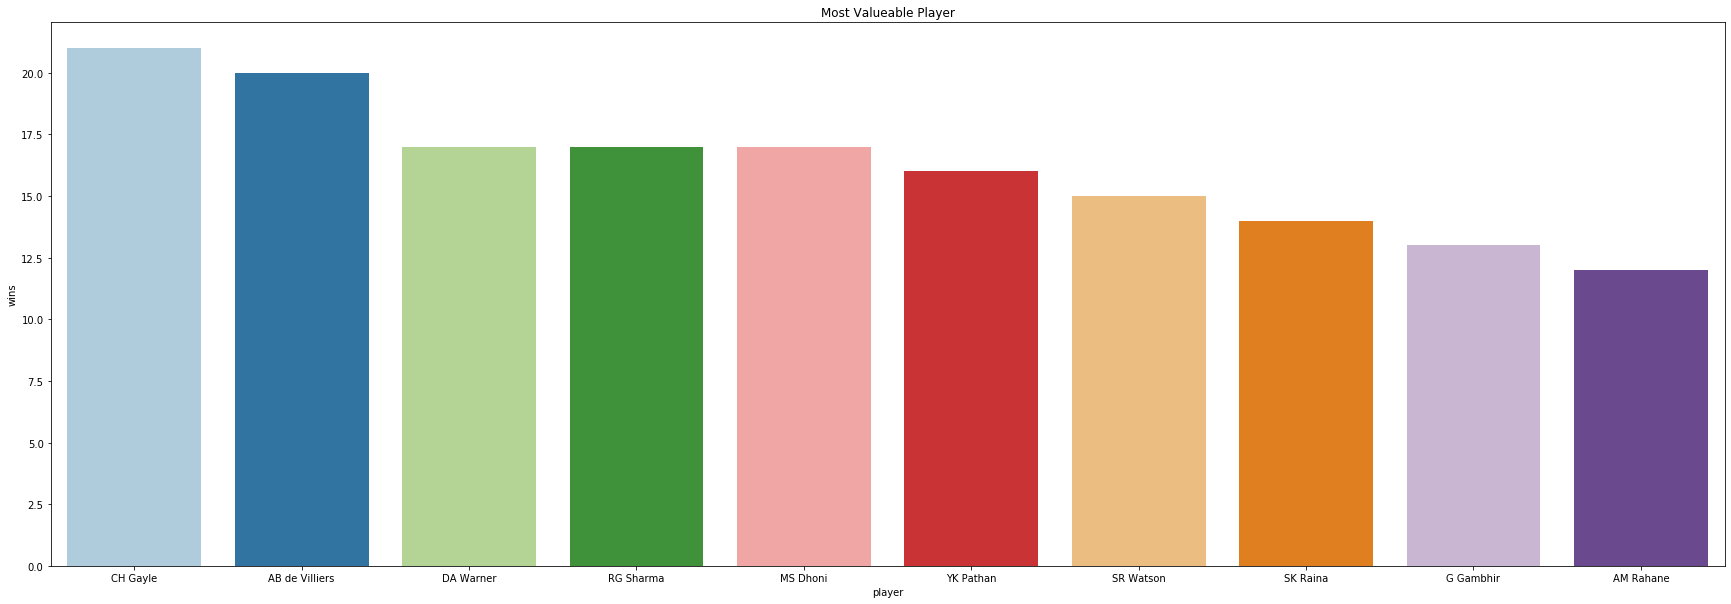

In [58]:
plt.figure(figsize = (30,10))
sns.barplot('player','wins',data=mvpdf,palette ='Paired')
plt.title('Most Valueable Player')
plt.show()

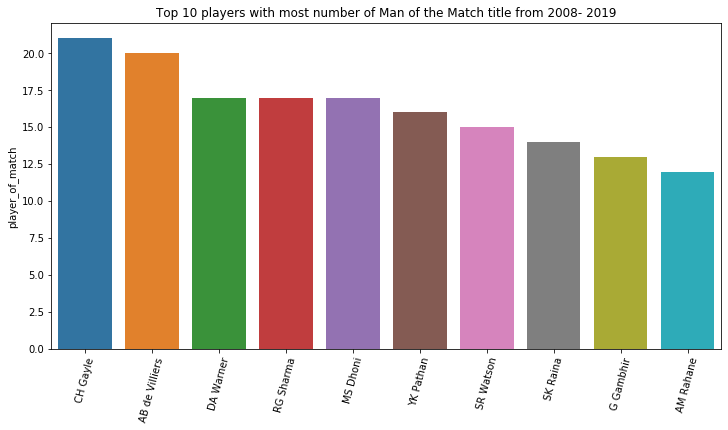

In [136]:
mom = ipl_match.player_of_match.value_counts()
mom10 = mom[:10]
plt.figure(figsize=(12,6))
sns.barplot(mom10.index, mom10)
plt.xticks(rotation=75)
plt.title('Top 10 players with most number of Man of the Match title from 2008- 2019')
plt.show()

##### Chris Gayle has the most "Man of the Matches" award followed by AB Devilliers. Out of the top ten players 6 Indian players are part of this list.

#### 3. Factors contributing to win or loss for a team

In [81]:
team_wins = ipl_match['winner'].value_counts()

team_winsdf = pd.DataFrame(columns=["team", "wins"])
for items in team_wins.iteritems():
    temp_df1 = pd.DataFrame({
        'team':[items[0]],
        'wins':[items[1]]
    })
    team_winsdf = team_winsdf.append(temp_df1, ignore_index=True)

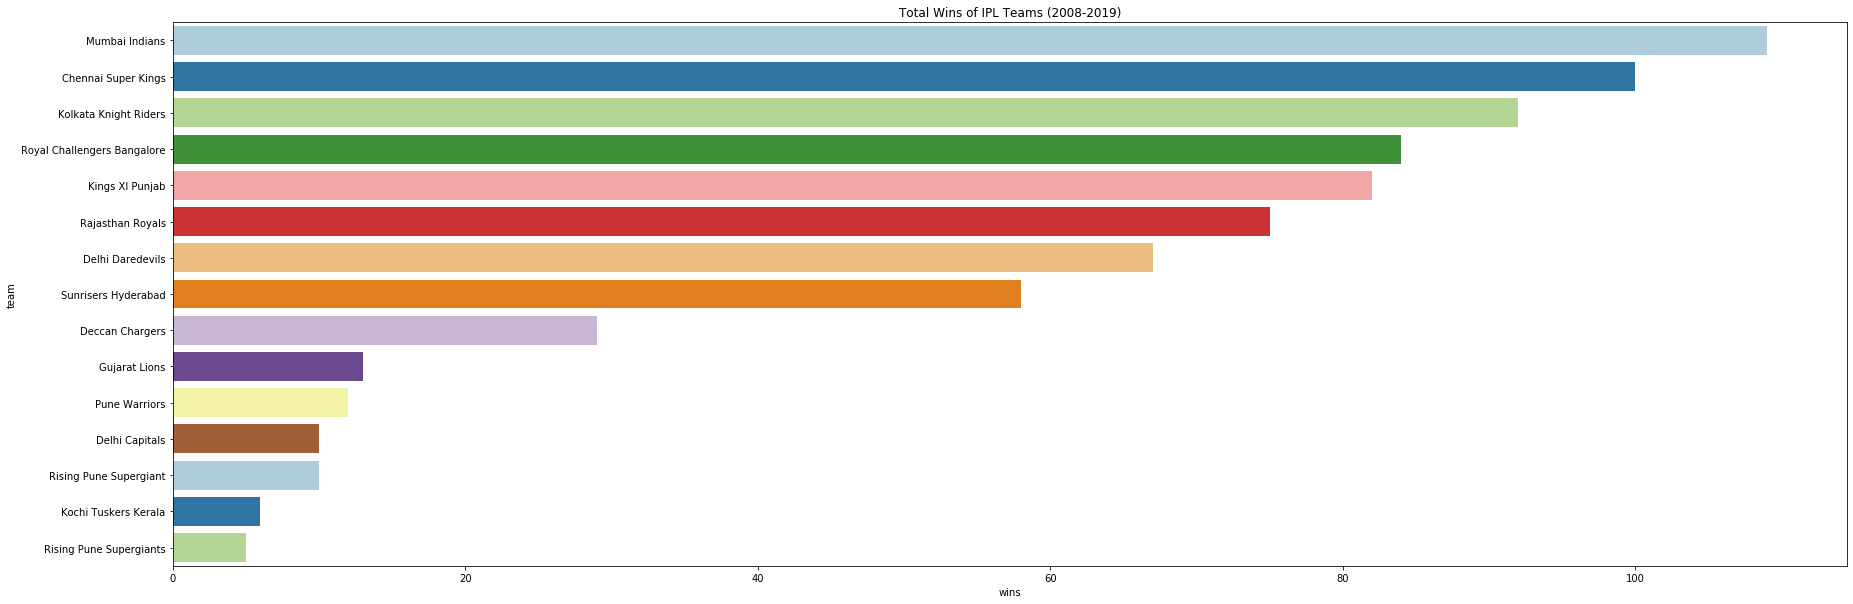

In [88]:
plt.figure(figsize = (30,10))
sns.barplot(x='wins', y='team', data=team_winsdf, palette='Paired')
plt.title("Total Wins of IPL Teams (2008-2019)")
plt.show()

##### Mumbai Indians have the most wins followed by Chennai Super Kings and Kolkata Knight Riders

1. <u>Toss Winner</u>

In [63]:
toss = ipl_match['toss_winner'].value_counts()

tossdf = pd.DataFrame(columns=["team", "wins"])

for items in toss.iteritems():
    temp_df3 = pd.DataFrame({
        'team':[items[0]],
        'wins':[items[1]]
    })
    tossdf = tossdf.append(temp_df3, ignore_index=True) 

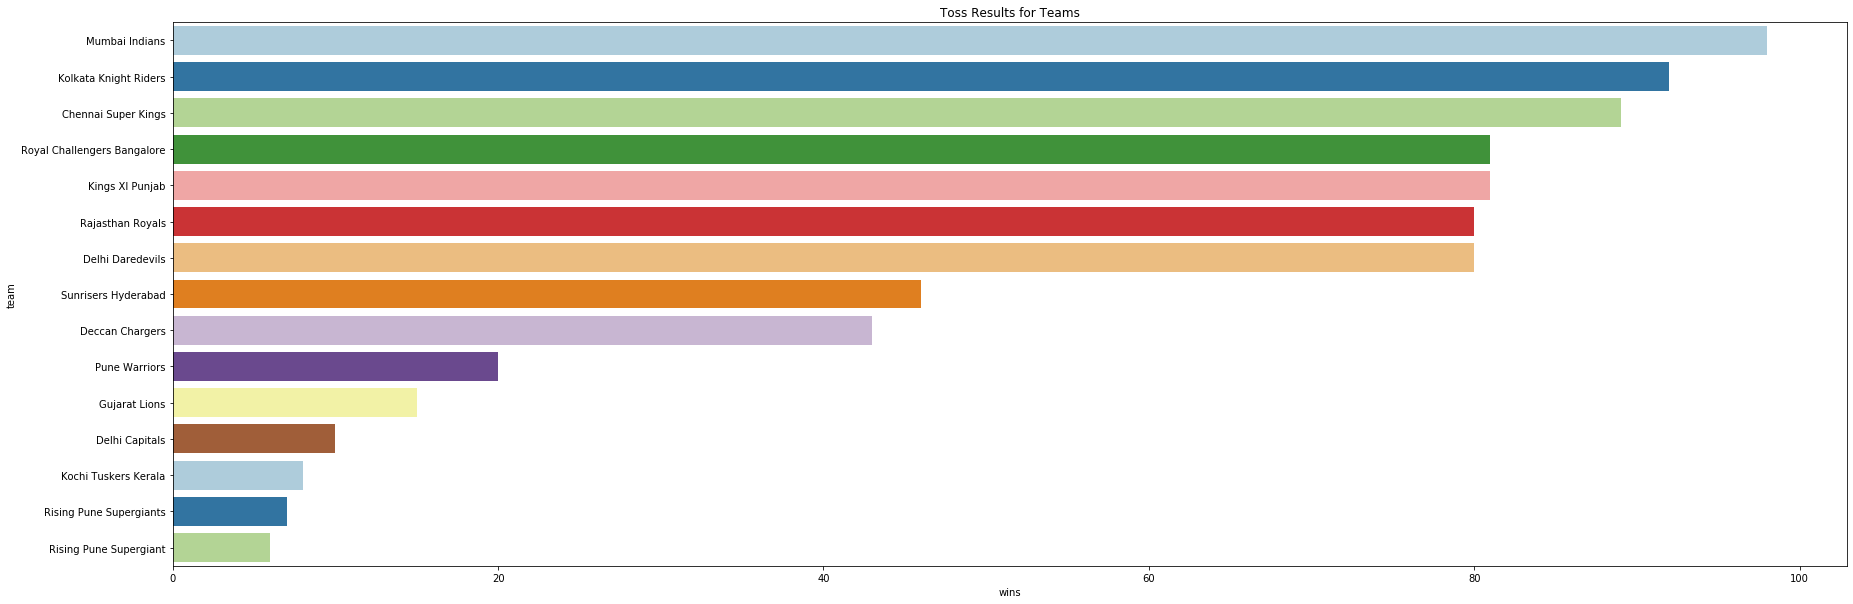

In [70]:
plt.figure(figsize = (30,10))
sns.barplot('wins','team',data=tossdf,palette ='Paired')
plt.title('Toss Results for Teams')
plt.show()

##### Mumbai Indians have won the most tosses in IPL history, followed by Kolkatta Knight Riders and Chennai Super Kings. All the top IPL teams in IPL are also successful in winning the toss as well.

<u>Does Winning toss has any advantage ?</u>

In [72]:
win_count = 0
for index, value in ipl_match.iterrows():
    if(value['toss_winner']==value['winner']):
#         print(value['winner'])
        win_count += 1

print(f'The number of times the team winning toss have won: {win_count}')
prob = win_count/len(ipl_match)
print('The probability of winning if won the toss: {:.2f}' .format(prob))

The number of times the team winning toss have won: 393
The probability of winning if won the toss: 0.52


##### Thus probability of a team winning a match after a winning a toss is 52%. So it can be concluded that winning a toss gives a slight edge to the team, however, it cannot be considered as a major factor contributing to win or loss for a team

2. <u>Venue</u>

In [76]:
venue = ipl_match['venue'].value_counts()

venuedf = pd.DataFrame(columns=['venue', 'matches'])
for items in venue.iteritems():
    temp_df = pd.DataFrame({
        'venue':[items[0]],
        'matches':[items[1]]
    })
    venuedf = venuedf.append(temp_df, ignore_index=True)

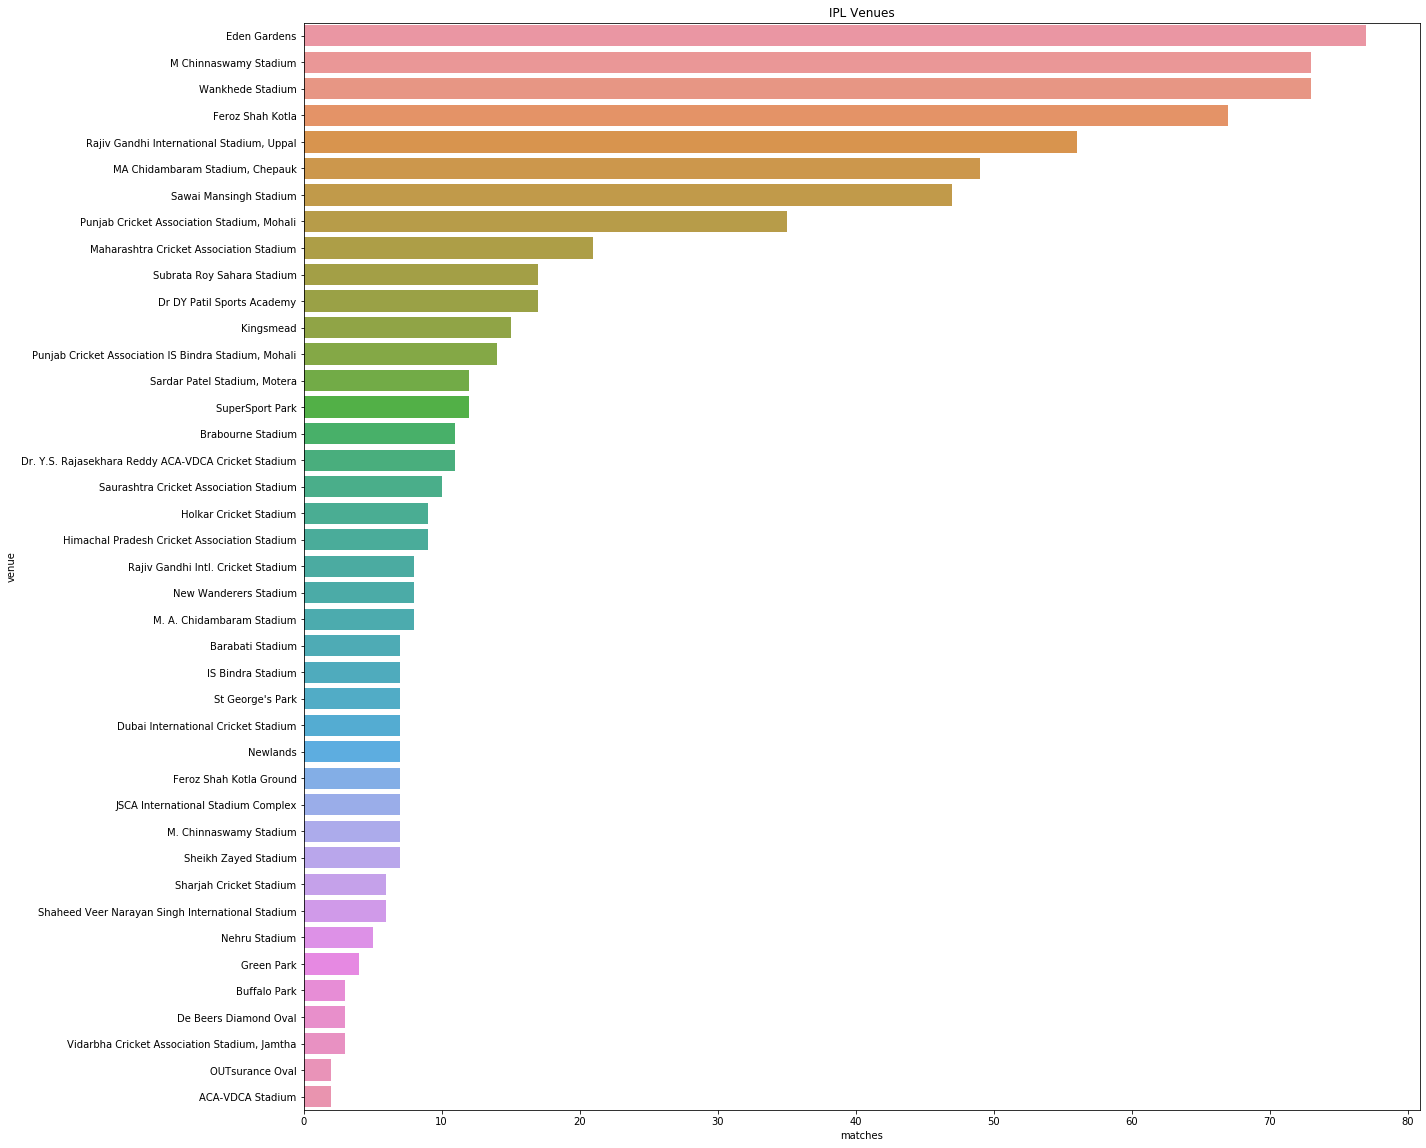

In [79]:
plt.figure(figsize = (20,20))
sns.barplot(x='matches', y='venue', data=venuedf)
plt.title("IPL Venues")
plt.show()

##### Eden Gardens has hosted the maximum numbers of IPL matches followed by Wankhede and M Chinnaswamy Stadiums. It is interesting to note that the top three venues are homegrounds for the top three teams of IPL. Even though playing at homeground is an advantage, it cannot be determined as a major factor.

3. <u>Is it better to chase or defend ?</u>

In [108]:
ipl_match['win_by_runs'].describe()

count    756.000000
mean      13.283069
std       23.471144
min        0.000000
25%        0.000000
50%        0.000000
75%       19.000000
max      146.000000
Name: win_by_runs, dtype: float64

In [109]:
winbyrun = ipl_match['win_by_runs'].value_counts()
winbyrun

0      419
14      13
4       11
10      11
1       10
13       9
23       9
15       9
7        9
9        9
22       9
37       8
24       8
12       8
19       8
2        7
11       7
25       7
6        7
17       7
18       7
27       6
16       6
20       6
34       6
5        6
41       5
8        5
45       5
38       5
      ... 
77       1
93       1
102      1
87       1
105      1
111      1
118      1
130      1
138      1
140      1
42       1
74       1
76       1
75       1
144      1
47       1
50       1
36       1
51       1
53       1
57       1
59       1
60       1
61       1
62       1
64       1
66       1
67       1
72       1
146      1
Name: win_by_runs, Length: 89, dtype: int64

###### It is observed that 419 matches are won by chasing the target. 

In [94]:
ipl_match['win_by_wickets'].describe()

count    756.000000
mean       3.350529
std        3.387963
min        0.000000
25%        0.000000
50%        4.000000
75%        6.000000
max       10.000000
Name: win_by_wickets, dtype: float64

In [111]:
winbywicket = ipl_match['win_by_wickets'].value_counts()
winbywicket

0     350
6      85
7      80
5      71
8      54
4      41
9      37
3      18
10     11
2       6
1       3
Name: win_by_wickets, dtype: int64

##### It is observed only 350 matches are won defending the target

###### Out of the total matches played from 2008-2019, most of the matches won are won batting second. However, we need to keep into account that pitches and weather conditions play an important role in teams decision to bat or bowl first. Since we donot have such data available , it would not be right to consider this as a major factor.

#### 4. Team or players a company should endrose 

In [113]:
ipl_match2 = pd.read_csv('deliveries.csv')
ipl_match2.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [115]:
#Understanding the dataset
ipl_match2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
match_id            179078 non-null int64
inning              179078 non-null int64
batting_team        179078 non-null object
bowling_team        179078 non-null object
over                179078 non-null int64
ball                179078 non-null int64
batsman             179078 non-null object
non_striker         179078 non-null object
bowler              179078 non-null object
is_super_over       179078 non-null int64
wide_runs           179078 non-null int64
bye_runs            179078 non-null int64
legbye_runs         179078 non-null int64
noball_runs         179078 non-null int64
penalty_runs        179078 non-null int64
batsman_runs        179078 non-null int64
extra_runs          179078 non-null int64
total_runs          179078 non-null int64
player_dismissed    8834 non-null object
dismissal_kind      8834 non-null object
fielder             6448 non-null object
dtype

In [116]:
#Checking for columns which are empty
ipl_match2.isna().sum()/len(ipl_match)

match_id              0.000000
inning                0.000000
batting_team          0.000000
bowling_team          0.000000
over                  0.000000
ball                  0.000000
batsman               0.000000
non_striker           0.000000
bowler                0.000000
is_super_over         0.000000
wide_runs             0.000000
bye_runs              0.000000
legbye_runs           0.000000
noball_runs           0.000000
penalty_runs          0.000000
batsman_runs          0.000000
extra_runs            0.000000
total_runs            0.000000
player_dismissed    225.190476
dismissal_kind      225.190476
fielder             228.346561
dtype: float64

##### Columns "player_dissmed", "dismissal_kind" and "fielder"  have the most missing values. However, these columns are not being dropped. This is because there are only a few instances in a match when there is a dismissal. Thus, removing these columns would lead to loosing valuable information.

1. <u>Top 10 Highest Run Scorer</u> 

In [131]:
batsmen = ipl_match2.groupby('batsman').apply(lambda x: np.sum(x['batsman_runs'])).reset_index(name='Runs')
batsmen_sorted=batsmen.sort_values(by='Runs',ascending=False)
topbat=batsmen_sorted[:10]
topbat.head(3)

,batsman,Runs
486,V Kohli,5434
428,SK Raina,5415
367,RG Sharma,4914


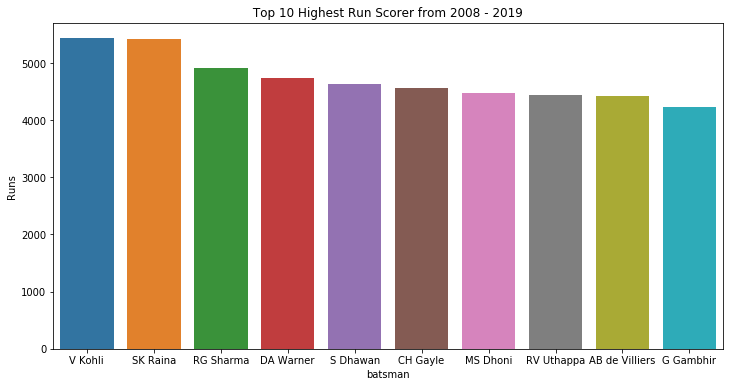

In [129]:
plt.figure(figsize=(12,6))
sns.barplot(topbat['batsman'],topbat['Runs'])
plt.title(' Top 10 Highest Run Scorer from 2008 - 2019 ')
plt.show()

##### It is observed that Virat Kohli scored the most runs 5434 followed by Suresh Raina with 5415 runs and Rohit Sharma with 4914 runs

2. <u>Top 10 Highest Wicket Takers</u>

In [132]:
wicket = ipl_match2[ipl_match2['dismissal_kind']!='run out']
bowlers = wicket.groupby('bowler').apply(lambda x :x['dismissal_kind'].dropna()).reset_index(name='Wickets')
bowlerscount = bowlers.groupby('bowler').count().reset_index()
topbowlers = bowlerscount.sort_values(by="Wickets",ascending=False)
top10bowlers = topbowlers.loc[:,['bowler','Wickets']][0:10]
top10bowlers.head(3)

,bowler,Wickets
290,SL Malinga,170
6,A Mishra,156
110,Harbhajan Singh,150


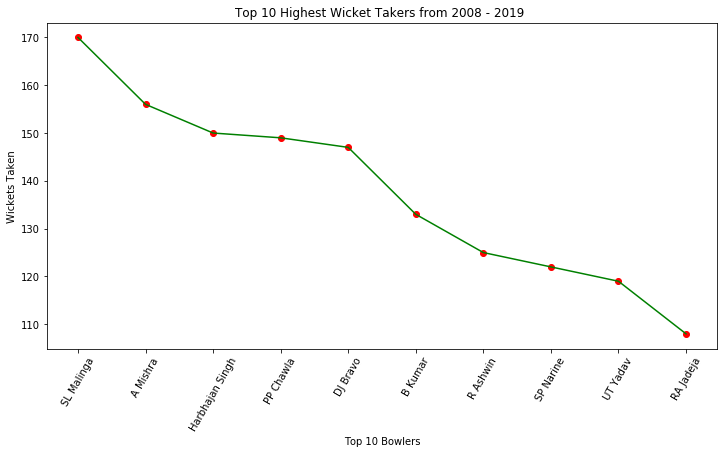

In [130]:
plt.figure(figsize=(12,6))
plt.scatter(top10bowlers['bowler'],top10bowlers['Wickets'],color='r');
plt.plot(top10bowlers['bowler'],top10bowlers['Wickets'],color='g');
plt.xticks(rotation=60)
plt.xlabel('Top 10 Bowlers')
plt.ylabel('Wickets Taken')
plt.title('Top 10 Highest Wicket Takers from 2008 - 2019 ')
plt.show()

##### Lasith Malinga is the highest wicket taker in the IPL till 2019 with 170 wickets followed by Amit Mishra with 156 and Harbhajan Singh with 150 wickets

3. <u>Teams with best win-percentage</u> 

In [156]:
# Matches played vs Matches won
matchesplay = pd.concat([ipl_match['team1'],ipl_match['team2']])
matchesplay = matchesplay.value_counts().reset_index()
matchesplay.columns = ['Team','Total Matches']
matchesplay['Wins']= ipl_match['winner'].value_counts().reset_index()['winner']
matchesplay.set_index('Team',inplace= True)

In [157]:
matchesplay.reset_index()

,Team,Total Matches,Wins
0,Mumbai Indians,187,109
1,Royal Challengers Bangalore,180,100
2,Kolkata Knight Riders,178,92
3,Kings XI Punjab,176,84
4,Chennai Super Kings,164,82
5,Delhi Daredevils,161,75
6,Rajasthan Royals,147,67
7,Sunrisers Hyderabad,108,58
8,Deccan Chargers,75,29
9,Pune Warriors,46,13


In [168]:
winpercentage = round(matchesplay["Wins"]/matchesplay["Total Matches"],3)*100
matchesplay['Win %']= winpercentage
matchesplay.head

<bound method NDFrame.head of                              Total Matches  Wins  Win %
Team                                                   
Mumbai Indians                         187   109   58.3
Royal Challengers Bangalore            180   100   55.6
Kolkata Knight Riders                  178    92   51.7
Kings XI Punjab                        176    84   47.7
Chennai Super Kings                    164    82   50.0
Delhi Daredevils                       161    75   46.6
Rajasthan Royals                       147    67   45.6
Sunrisers Hyderabad                    108    58   53.7
Deccan Chargers                         75    29   38.7
Pune Warriors                           46    13   28.3
Gujarat Lions                           30    12   40.0
Rising Pune Supergiant                  16    10   62.5
Delhi Capitals                          16    10   62.5
Kochi Tuskers Kerala                    14     6   42.9
Rising Pune Supergiants                 14     5   35.7>

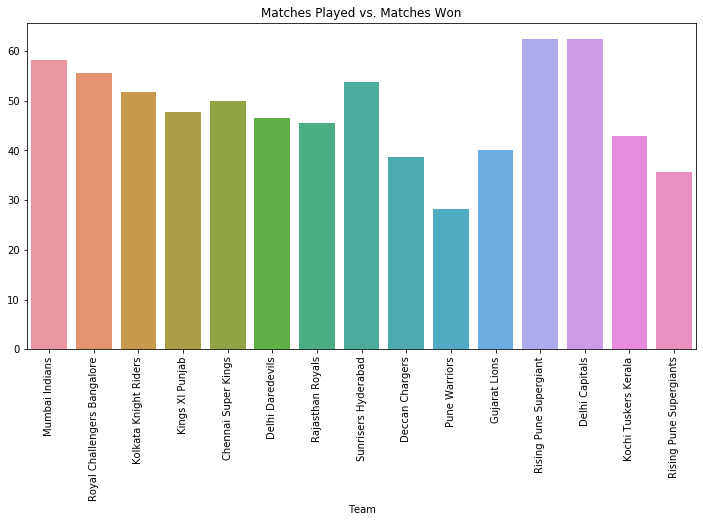

In [173]:
plt.figure(figsize=(12,6))
sns.barplot(matchesplay['Total Matches'].index, winpercentage)
plt.xticks(rotation=90)
plt.title('Matches Played vs. Matches Won')
plt.show()

##### It can be seen that Delhi Capitals and Rising Pune Supergiants have the best win percentage with 62.5%. However, it is observed that the number of matches played by both the teams are very few compared to the top performing teams. Delhi Capitals used to play as Delhi Daredevils, thus including stats only for Delhi Capitals while Rising Pune Supergiants participated only in two IPL editions (2016 and 2017).
##### It is concluded that Mumbai Indians have the best win percentage. 

### Conclusion : 

#### 1. <u>Most successful team, players and factors contributing win or loss for a team</u> 

1. Mumbai Indians is most succesful team, winning the trophy 4 times followed by Chennai Super Kings and Kolkata Knight Riders winning the tournament thrice and twice respectively.


2. Virat Kohli has been the highest run scorer in the tournament history with 5434 runs followed by Suresh Raina and Rohit Sharma.


3. Lasith Malinga has been the highest wicket taker in the tournament followed by Amit Mishra and Harbhajan SIngh.


4. Toss, playing at Homeground and choice of defending/chasing the target provides a slight edge to the winning side, however, these factors do not contribute majorly to the decision.


5. Off the total matches played in the tournament, 419 matches were won chasing the target as compared to 350 matches won defending the target 

#### 2. <u>Team or players a company should endorse for its products</u> 

1. Mumbai Indians is the most consistent team followed by Chennai Super Kings and Kolkatta Knight Riders with a large fan base, thus products should target endrosing this team.


2. Players like Virat Kohli, Rohit Sharma, MS Dhoni , Harbhajan Singh can be considered as pillar of this tournament.Thus targeting these players would help brands significantly.


3. Players like Lasith Malinga, Chris Gayle, AB DeVilliers and David Warner can be considered for gloabal reach of the brands.